# RNN LSTM Regressor using Keras

In this tutorial, we will demonstrates how to do regression problem with RNN  
The original tutorial is from https://github.com/MorvanZhou/tutorials/blob/master/tensorflowTUT/tf20_RNN2.2/full_code.py

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "3"
os.environ['KERAS_BACKEND']='tensorflow'
from IPython import display
import pylab as pl
import time

Using TensorFlow backend.


## Hyper Parameters

In [2]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20    #number of hidden units
LR = 0.006   #learning rate

In [6]:
xs

array([[  0.        ,   0.03183099,   0.06366198,   0.09549297,
          0.12732395,   0.15915494,   0.19098593,   0.22281692,
          0.25464791,   0.2864789 ,   0.31830989,   0.35014087,
          0.38197186,   0.41380285,   0.44563384,   0.47746483,
          0.50929582,   0.54112681,   0.5729578 ,   0.60478878],
       [  0.63661977,   0.66845076,   0.70028175,   0.73211274,
          0.76394373,   0.79577472,   0.8276057 ,   0.85943669,
          0.89126768,   0.92309867,   0.95492966,   0.98676065,
          1.01859164,   1.05042262,   1.08225361,   1.1140846 ,
          1.14591559,   1.17774658,   1.20957757,   1.24140856],
       [  1.27323954,   1.30507053,   1.33690152,   1.36873251,
          1.4005635 ,   1.43239449,   1.46422548,   1.49605647,
          1.52788745,   1.55971844,   1.59154943,   1.62338042,
          1.65521141,   1.6870424 ,   1.71887339,   1.75070437,
          1.78253536,   1.81436635,   1.84619734,   1.87802833],
       [  1.90985932,   1.94169031,  

Generate fake date, X = sin, Y= cos. we are using sequence data X to predict sequence Y

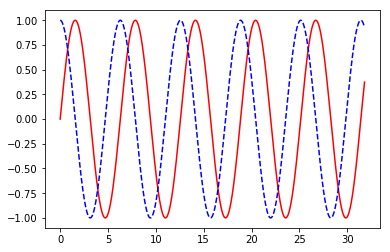

In [3]:
xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
seq = np.sin(xs)
res = np.cos(xs)
plt.plot(xs.flatten(),seq.flatten(),'r',xs.flatten(),res.flatten(), 'b--')
#plt.plot(seq.flatten(),res.flatten(), 'b--')
plt.show()

In [4]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs[:, :, np.newaxis]]

## Build model

In [5]:
model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(
        BATCH_SIZE, TIME_STEPS, INPUT_SIZE),   
    output_dim=CELL_SIZE,
    return_sequences=True,     
    stateful=True,             
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

SyntaxError: invalid syntax (<ipython-input-5-909830c1ca9f>, line 11)

## Train the model

In [ ]:
print('Training ------------')
for step in range(50):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    pl.plot(xs[0,:], Y_batch[0].flatten(), 'r', xs[0,:], pred.flatten()[:TIME_STEPS], 'b--')
    pl.ylim((-1.2, 1.2))
    plt.title('train cost: %f' %cost)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)

